In [1]:
import neurokit as nk
import bioread
import pandas as pd
import numpy as np
import wfdb 
from wfdb import processing

In [2]:
cd C:\Users\Ruddy\Desktop\signal data\test2

C:\Users\Ruddy\Desktop\signal data\test2


In [3]:
#opening acq file
data = bioread.read_file("3Registros_test2.acq")
type(data)

bioread.biopac.Datafile

In [4]:
ecg = data.channels[1]
type(ecg)

bioread.biopac.Channel

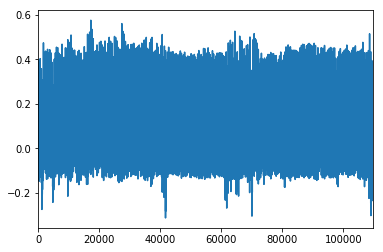

In [6]:
pd.Series(ecg.data).plot() #plotting ecg channel

Populating the interactive namespace from numpy and matplotlib


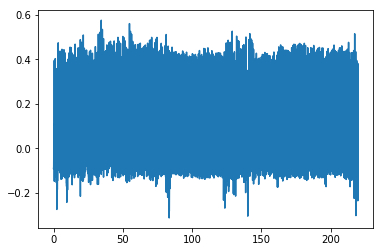

In [8]:
%pylab inline
plt.plot(ecg.time_index, ecg.data, label='{} ({})'.format(ecg.name, ecg.units))

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


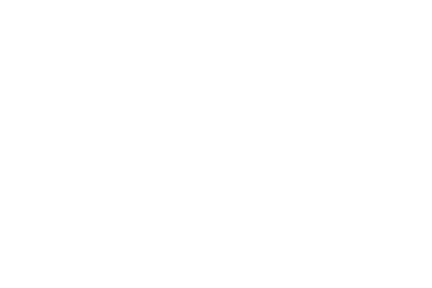

<IPython.core.display.Javascript object>


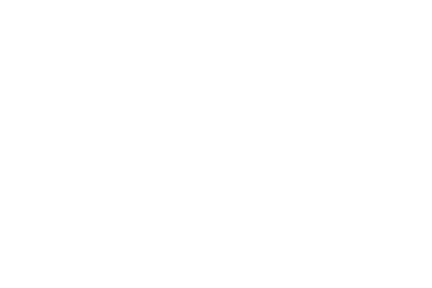

In [140]:
%pylab notebook
plt.plot(ecg.time_index, ecg.data, label='{} ({})'.format(ecg.name, ecg.units))

In [11]:
np.array(ecg.data).shape

(109855,)

In [12]:
pd.Series(ecg.data).describe()

count    109855.000000
mean         -0.001404
std           0.085897
min          -0.314026
25%          -0.044556
50%          -0.018768
75%           0.023346
max           0.576324
dtype: float64

In [13]:
ecg.units

'mV'

In [15]:
ecg

Channel ECG - ECG100C: 109855 samples, 500.0 samples/sec, loaded: True

In [17]:
ecg_preprocessed = nk.ecg_preprocess(ecg.data)
ecg_preprocessed

{'df':          ECG_Raw  ECG_Filtered  ECG_R_Peaks  Heart_Rate  ECG_Systole
 0      -0.089874     -0.003808          NaN         NaN            0
 1      -0.089874     -0.002371          NaN         NaN            0
 2      -0.094452     -0.000935          NaN         NaN            0
 3      -0.092773      0.000500          NaN         NaN            0
 4      -0.084534      0.001928          NaN         NaN            0
 5      -0.075531      0.003342          NaN         NaN            0
 6      -0.073700      0.004731          NaN         NaN            0
 7      -0.076599      0.006076          NaN         NaN            0
 8      -0.076141      0.007358          NaN         NaN            0
 9      -0.070190      0.008555          NaN         NaN            0
 10     -0.063782      0.009641          NaN         NaN            0
 11     -0.062866      0.010595          NaN         NaN            0
 12     -0.066681      0.011394          NaN         NaN            0
 13     -0.065

In [19]:
r_peaks = ecg_preprocessed['ECG']['R_Peaks']
r_peaks.shape    #with no filter

(288,)

In [21]:
r_peaks_excel = pd.read_excel('rr_peaks.xls')
len(r_peaks_excel)
#rr peaks obtained visually

*** No CODEPAGE record, no encoding_override: will use 'ascii'


106

In [119]:
#highpass filter
ecg_preprocessed_highpass = nk.ecg_preprocess(ecg.data, filter_band = 'highpass', filter_frequency = 6.9)
#ecg_preprocessed_highpass

In [120]:
r_peaks_filter_hp = ecg_preprocessed_highpass['ECG']['R_Peaks']
r_peaks_filter_hp.shape

(288,)

In [98]:
#lowpass filter
ecg_preprocessed_lowpass = nk.ecg_preprocess(ecg.data, filter_band = 'lowpass', filter_frequency = 7.1)
#ecg_preprocessed_highpass

In [100]:
#with a lowpass of 7.1
r_peaks_filter_lp = ecg_preprocessed_lowpass['ECG']['R_Peaks']
r_peaks_filter_lp.shape

(105,)

In [96]:
#bandpass filter
ecg_preprocessed_bandpass = nk.ecg_preprocess(ecg.data, filter_band = 'bandpass', filter_frequency = [.009, 7.1])
#ecg_preprocessed_highpass

In [97]:
#with a bandpass above 50
r_peaks_filter_bp = ecg_preprocessed_bandpass['ECG']['R_Peaks']
r_peaks_filter_bp.shape

(107,)

In [139]:
type(r_peaks_filter_bp)

numpy.ndarray

In [122]:
sampling_rate = 500 #defining sampling rate

In [131]:
r_peaks_excel = r_peaks_excel.iloc[:,0]
r_peaks_excel = (r_peaks_excel[:-2]*1000).astype(int)
r_peaks_excel.head()

0     436
1    1164
2    1888
3    2594
4    3282
Name: Time, dtype: int32

In [135]:
r_peaks_excel.to_numpy()

array([  436,  1164,  1888,  2594,  3282,  3948,  4612,  5296,  5988,
        6686,  7428,  8252,  9000,  9694, 10410, 11114, 11838, 12594,
       13334, 14034, 14722, 15474, 16202, 16946, 17716, 18506, 19252,
       19974, 20674, 21388, 22128, 22910, 23706, 24458, 25198, 25912,
       26586, 27250, 27948, 28678, 29388, 30108, 30842, 31562, 32250,
       32922, 33622, 34354, 35156, 35968, 36790, 37596, 38396, 39216,
       40098, 40984, 41868, 42756, 43670, 44584, 45486, 46410, 47332,
       48250, 49118, 49922, 50658, 51382, 52070, 52748, 53398, 54048,
       54718, 55440, 56228, 57060, 57938, 58822, 59692, 60600, 61588,
       62542, 63474, 64385, 65290, 66174, 67030, 67814, 68546, 69264,
       69990, 70754, 71540, 72284, 73006, 73774, 74560, 75388, 76144,
       76882, 77648, 78420, 79146, 79838])

In [136]:
#hrv excel
hrv_excel = nk.bio_ecg.ecg_hrv(rpeaks=r_peaks_excel, sampling_rate=sampling_rate)
hrv_excel

NeuroKit Warning: ecg_hrv(): Sequence too short to compute interpolation. Will skip many features.


{'n_Artifacts': 0.9805825242718447, 'RR_Intervals': 69    1300.0
 70    1300.0
 dtype: float64, 'RMSSD': 0.0, 'meanNN': 1300.0, 'sdNN': 0.0, 'cvNN': 0.0, 'CVSD': 0.0, 'medianNN': 1300.0, 'madNN': 0.0, 'mcvNN': 0.0, 'pNN50': 0.0, 'pNN20': 0.0}

In [137]:
r_peaks_filter_bp

array([   374,   4281,   6082,   9554,  10492,  11049,  12571,  16435,
        16974,  17551,  18153,  18560,  18959,  19358,  20208,  21537,
        22450,  23366,  23829,  24284,  24723,  26520,  28277,  28693,
        29132,  29572,  30011,  30461,  30956,  31435,  31900,  32349,
        32807,  33250,  33678,  35539,  37439,  40234,  40538,  41201,
        41673,  53545,  53945,  59160,  59557,  62442,  63824,  64422,
        65007,  65592,  66759,  67329,  68229,  68801,  69541,  70311,
        72729,  74504,  75507,  75948,  76383,  76830,  77269,  77707,
        78145,  81213,  83975,  84384,  84809,  85234,  85658,  86458,
        86872,  87296,  87721,  88122,  88962,  89401,  89826,  90219,
        90630,  91480,  91861,  94824,  95206,  95625,  96078,  96525,
        96932,  97315,  98426,  98836,  99224,  99647, 100079, 100524,
       100951, 101750, 102167, 102594, 104150, 105330, 105735, 106168,
       106630, 106968, 108085])

In [133]:
#hrv bandpass
hrv_bp = nk.bio_ecg.ecg_hrv(rpeaks=r_peaks_filter_bp, sampling_rate=sampling_rate)
hrv_bp

    Using multitaper spectrum estimation with 7 DPSS windows
NeuroKit warning: complexity_entropy_multiscale(): Signal might be to short to compute SampEn for scale factors > 2. Setting max_scale_factor to 2.


C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'n_Artifacts': 0.4339622641509434, 'RR_Intervals': 7      1078.0
 8      1154.0
 9      1204.0
 11      798.0
 12      798.0
 18      910.0
 19      878.0
 23      878.0
 24      880.0
 25      878.0
 26      900.0
 27      990.0
 28      958.0
 29      930.0
 30      898.0
 31      916.0
 32      886.0
 33      856.0
 37      608.0
 39      944.0
 41      800.0
 43      794.0
 47     1170.0
 48     1170.0
 50     1140.0
 52     1144.0
 58      882.0
 59      870.0
 60      894.0
 61      878.0
 62      876.0
 63      876.0
 67      850.0
 68      850.0
 69      848.0
 71      828.0
 72      848.0
 73      850.0
 74      802.0
 76      878.0
 77      850.0
 78      786.0
 79      822.0
 81      762.0
 83      764.0
 84      838.0
 85      906.0
 86      894.0
 87      814.0
 88      766.0
 90      820.0
 91      776.0
 92      846.0
 93      864.0
 94      890.0
 95      854.0
 97      834.0
 98      854.0
 102     866.0
 103     924.0
 dtype: float64, 'RMSSD': 105.92322131411659, 'me

In [138]:
hrv_lp = nk.bio_ecg.ecg_hrv(rpeaks = r_peaks_filter_lp, sampling_rate = sampling_rate)
hrv_lp

    Using multitaper spectrum estimation with 7 DPSS windows
NeuroKit warning: complexity_entropy_multiscale(): Signal might be to short to compute SampEn for scale factors > 2. Setting max_scale_factor to 2.


C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'n_Artifacts': 0.4326923076923077, 'RR_Intervals': 7      1078.0
 8      1154.0
 9      1204.0
 11      798.0
 12      798.0
 18      910.0
 19      878.0
 23      878.0
 24      880.0
 25      878.0
 26      900.0
 27      990.0
 28      958.0
 29      930.0
 30      898.0
 31      916.0
 32      886.0
 33      856.0
 37      944.0
 39      800.0
 41      794.0
 45     1170.0
 46     1170.0
 48     1140.0
 50     1144.0
 56      882.0
 57      870.0
 58      894.0
 59      880.0
 60      874.0
 61      876.0
 65      850.0
 66      850.0
 67      848.0
 69      828.0
 70      848.0
 71      850.0
 72      802.0
 74      878.0
 75      850.0
 76      786.0
 77      822.0
 79      762.0
 81      764.0
 82      838.0
 83      906.0
 84      894.0
 85      814.0
 86      766.0
 88      820.0
 89      776.0
 90      846.0
 91      864.0
 92      890.0
 93      854.0
 95      834.0
 96      854.0
 100     866.0
 101     924.0
 dtype: float64, 'RMSSD': 92.40876208642138, 'meanNN': 893.42372